In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('credit_risk.csv')
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [4]:
df.tail()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26
32580,32780,66,42000,RENT,2.0,MEDICAL,6475,9.99,0,0.15,N,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [6]:
df.drop('Id',axis=1,inplace=True)

### checking null values

In [7]:
(df.isnull().sum()*100/len(df)).sort_values(ascending=False)

Rate              9.563856
Emp_length        2.747000
Age               0.000000
Income            0.000000
Home              0.000000
Intent            0.000000
Amount            0.000000
Status            0.000000
Percent_income    0.000000
Default           0.000000
Cred_length       0.000000
dtype: float64

### checking duplicates

In [8]:
df.duplicated().sum()

165

### filling null values in Rate with median

In [9]:
df['Rate'].fillna(df['Rate'].median(),inplace=True)

### multiplying percent income with 100 to  get the actual income in percentage

In [10]:
df['Percent_income']=df['Percent_income']*100

In [11]:
df

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,59.0,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,10.0,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,57.0,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,53.0,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,55.0,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,11.0,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,15.0,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,46.0,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,10.0,N,26


### replaceing outliers or extra big values with medians

In [12]:
median_emp_length = df['Emp_length'].median()

# Replace the incorrect value (123.0) with the median
df['Emp_length'] = df['Emp_length'].replace(123.0, median_emp_length)

# Check the updated dataset
print(df)

       Age  Income      Home  Emp_length           Intent  Amount   Rate  \
0       22   59000      RENT         4.0         PERSONAL   35000  16.02   
1       21    9600       OWN         5.0        EDUCATION    1000  11.14   
2       25    9600  MORTGAGE         1.0          MEDICAL    5500  12.87   
3       23   65500      RENT         4.0          MEDICAL   35000  15.23   
4       24   54400      RENT         8.0          MEDICAL   35000  14.27   
...    ...     ...       ...         ...              ...     ...    ...   
32576   57   53000  MORTGAGE         1.0         PERSONAL    5800  13.16   
32577   54  120000  MORTGAGE         4.0         PERSONAL   17625   7.49   
32578   65   76000      RENT         3.0  HOMEIMPROVEMENT   35000  10.99   
32579   56  150000  MORTGAGE         5.0         PERSONAL   15000  11.48   
32580   66   42000      RENT         2.0          MEDICAL    6475   9.99   

       Status  Percent_income Default  Cred_length  
0           1            59.0     

In [13]:
df['Age'].unique()

array([ 22,  21,  25,  23,  24,  26, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  40,  50,  45,  37,  39,  44,  43,
        41,  46,  38,  47,  42,  48,  49,  58,  65,  51,  53,  66,  61,
        54,  57,  59,  62,  60,  55,  52,  64,  70,  78,  69,  56,  73,
        63,  94,  80,  84,  76,  67], dtype=int64)

### replaceing outliers or extra big values with medians


In [14]:
age_length=df['Age'].median()
df['Age']=df['Age'].replace(123,age_length)
df['Age']=df['Age'].replace(144,age_length)


### making new column with name age_labels which will show that the person is adult,old or very old

In [15]:
df['Age_labels']=pd.cut(df.Age,bins=[20,40,65,94],labels=['Adults','Old','Very old'])
df

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length,Age_labels
0,22,59000,RENT,4.0,PERSONAL,35000,16.02,1,59.0,Y,3,Adults
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,10.0,N,2,Adults
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,57.0,N,3,Adults
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,53.0,N,2,Adults
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,55.0,Y,4,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,11.0,N,30,Old
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,15.0,N,19,Old
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,46.0,N,28,Old
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,10.0,N,26,Old


### dropping some remaining null values

In [16]:
df.dropna(inplace=True)

### changing the data type of Emp_length

In [17]:
df['Emp_length']=df['Emp_length'].astype(int)

# EDA(Exploratory Data Analysis)

<Axes: >

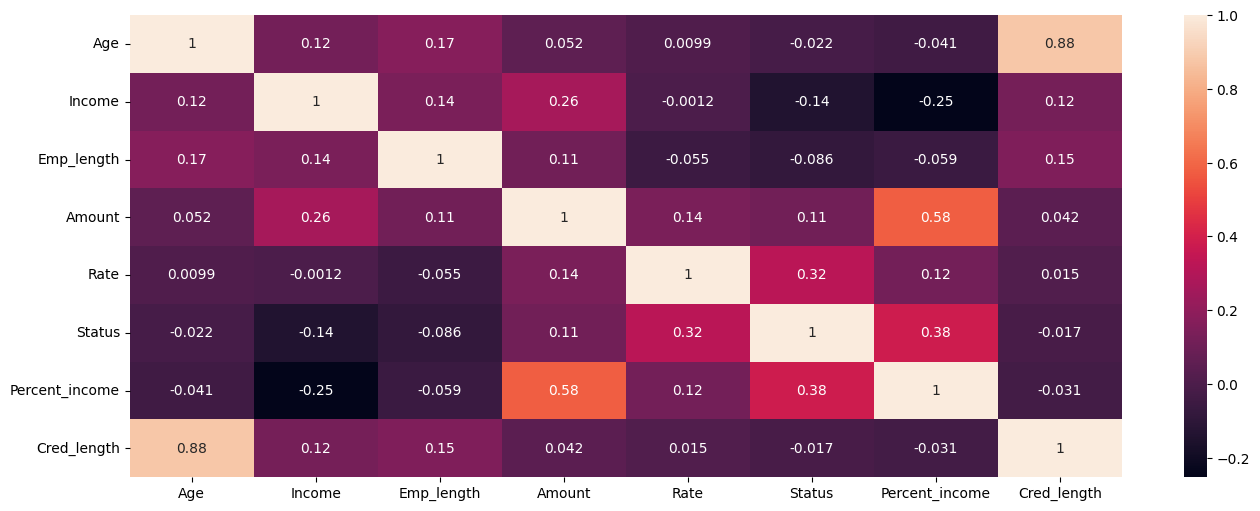

In [18]:
plt.figure(figsize=(16,6))
Numeric_cols=['Age','Income','Emp_length','Amount','Rate','Status', 'Percent_income', 'Cred_length']
sns.heatmap(df[Numeric_cols].corr(),annot=True)

Rate,Amount,Income,Emp_length,Percent_income,Default these are the key factors that influences credit risk in loan approval


Yes, demographic variables (e.g., age, income, education) affect the likelihood of
default

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Default', ylabel='Amount'>

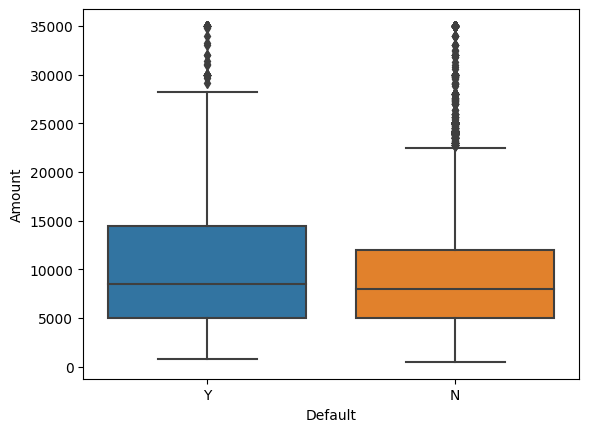

In [19]:
sns.boxplot(df,x=df['Default'],y=df['Amount'])

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

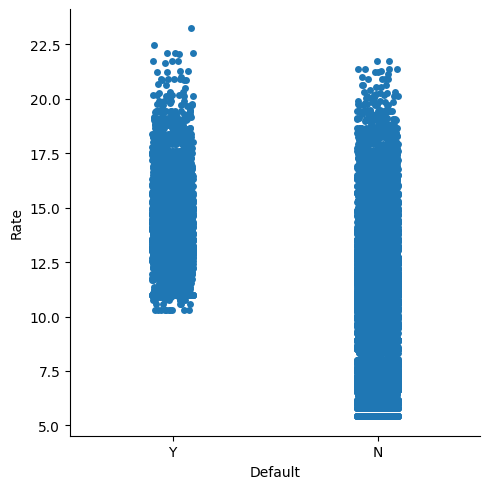

In [20]:
sns.catplot(df,x=df['Default'],y=df['Rate'])

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

<Axes: xlabel='Default', ylabel='Percent_income'>

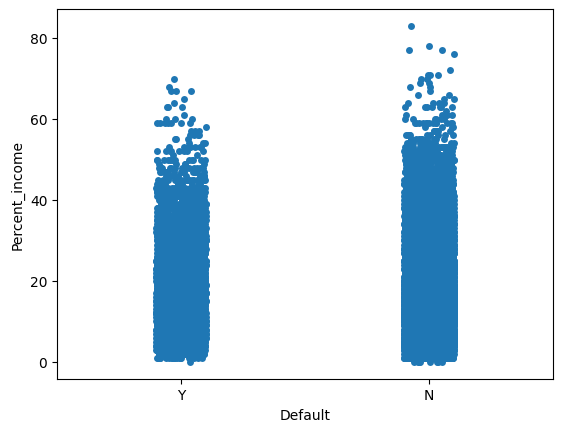

In [21]:
sns.stripplot(df,x=df['Default'],y=df['Percent_income'])

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Default', ylabel='Age'>

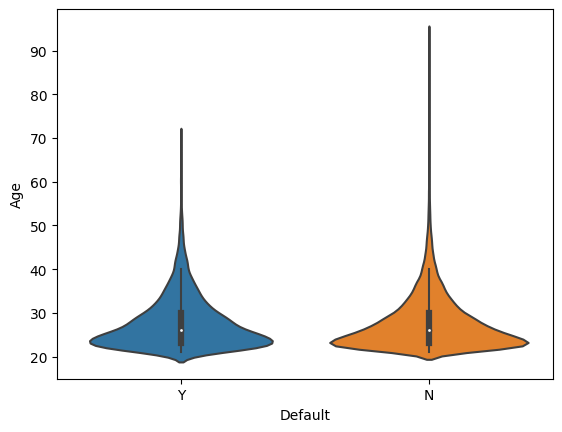

In [22]:
sns.violinplot(df,x=df['Default'],y=df['Age'])

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Default', ylabel='Income'>

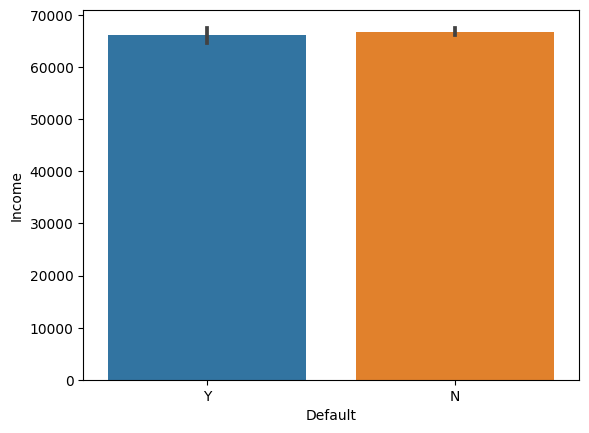

In [23]:
sns.barplot(df,x=df['Default'],y=df['Income'])

In [24]:
df.groupby('Default')['Rate'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
N,26045.0,10.355423,2.837514,5.42,7.88,10.65,11.86,21.74
Y,5626.0,14.179929,1.940211,10.28,12.99,13.99,15.31,23.22


In [25]:
df.groupby('Default')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
N,26045.0,66808.618852,63554.700001,4080.0,40000.0,56000.0,80000.0,6000000.0
Y,5626.0,66087.133843,56945.607349,4000.0,36822.0,54996.0,78200.0,2039784.0


In [26]:
df.groupby('Default')['Percent_income'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
N,26045.0,16.783106,10.561065,0.0,9.0,14.0,23.0,83.0
Y,5626.0,17.796125,10.906464,0.0,9.0,16.0,24.0,70.0


In [27]:
df.groupby('Default')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
N,26045.0,27.714533,6.204733,21.0,23.0,26.0,30.0,94.0
Y,5626.0,27.822254,6.246268,21.0,23.0,26.0,30.0,70.0



 credit history (e.g., credit score, previous defaults) plays an important assessing
credit risk if these factors aren't in the favour of the person or bank who is providing loan than they won't give loan


c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

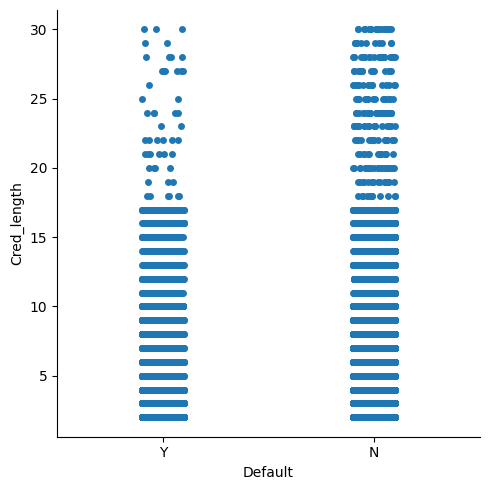

In [28]:
sns.catplot(df,x=df['Default'],y=df['Cred_length'])

In [29]:
df.groupby('Status')['Cred_length'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
0,24847.0,5.846943,4.049694,2.0,3.0,4.0,8.0,30.0
1,6824.0,5.678927,4.100659,2.0,3.0,4.0,8.0,30.0


In [30]:
df.groupby('Status')[['Age','Cred_length','Default']].describe()

Age                                                     \
          count       mean       std   min   25%   50%   75%   max   
Status                                                               
0       24847.0  27.806174  6.196189  21.0  23.0  26.0  30.0  94.0   
1        6824.0  27.469666  6.263379  21.0  23.0  26.0  30.0  70.0   

       Cred_length                                                
             count      mean       std  min  25%  50%  75%   max  
Status                                                            
0          24847.0  5.846943  4.049694  2.0  3.0  4.0  8.0  30.0  
1           6824.0  5.678927  4.100659  2.0  3.0  4.0  8.0  30.0

we have (Emp_length) column which shows the length of employement which will have to predict that loan repayment

In [31]:
df.groupby('Status')['Emp_length'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
0,24847.0,4.964664,4.061494,0.0,2.0,4.0,7.0,41.0
1,6824.0,4.120897,3.868217,0.0,1.0,3.0,6.0,34.0


c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd

<Axes: xlabel='Default', ylabel='Emp_length'>

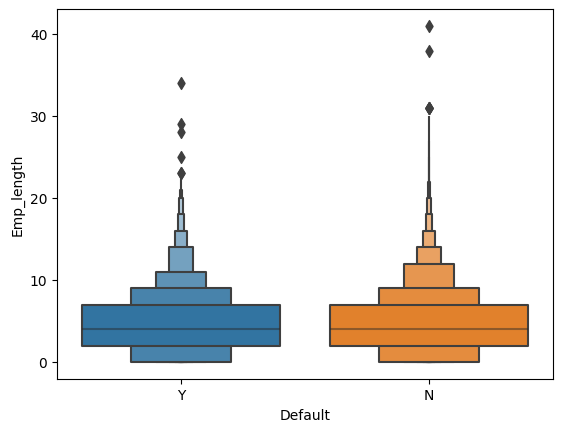

In [32]:
sns.boxenplot(df,x=df['Default'],y=df['Emp_length'])

### Now applying Machine learning

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC


In [34]:
df.select_dtypes(include=['object']).columns

Index(['Home', 'Intent', 'Default'], dtype='object')

### using label encoder

In [35]:
cat_cols=['Home','Intent','Default','Age_labels']
le=LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

### assigning value to 'x' variable and 'y' variable

In [36]:
x = df.drop(columns=['Status', 'Age_labels'], axis=1)
y = df['Status']


### training testing and splitting


In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=42)

### Using Logistic Regression

In [38]:
logistic=LogisticRegression()

In [39]:
logistic.fit(X_train,Y_train)
y_pred=logistic.predict(X_test)


c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

### Accuracy Score of Logisitic Regression

In [40]:
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred)*100,'%')

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6214
           1       0.74      0.16      0.26      1704

    accuracy                           0.81      7918
   macro avg       0.77      0.57      0.58      7918
weighted avg       0.79      0.81      0.75      7918

80.68956807274564 %


c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

### Support Vector Classifier

In [41]:
svc=SVC()


### Accuracy score of SVC

In [42]:
svc.fit(X_train,Y_train)
y_pred=svc.predict(X_test)
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred)*100,'%')



c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      6214
           1       0.92      0.07      0.13      1704

    accuracy                           0.80      7918
   macro avg       0.86      0.53      0.51      7918
weighted avg       0.82      0.80      0.72      7918

79.84339479666582 %


c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier



### Decision Tree Classifier

In [44]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_pred=dt.predict(X_test)
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred)*100,'%')


c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      6214
           1       0.70      0.73      0.71      1704

    accuracy                           0.87      7918
   macro avg       0.81      0.82      0.82      7918
weighted avg       0.88      0.87      0.87      7918

87.3326597625663 %


c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

### Random Forest Classifier

In [45]:
rb=RandomForestClassifier(n_estimators=10, random_state=42)

In [46]:
rb.fit(X_train,Y_train)

c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

RandomForestClassifier(n_estimators=10, random_state=42)

### Accuracy of Random Forest Classifier

In [47]:
y_pred=rb.predict(X_test)
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred)*100,'%')


              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6214
           1       0.92      0.62      0.74      1704

    accuracy                           0.91      7918
   macro avg       0.91      0.80      0.84      7918
weighted avg       0.91      0.91      0.90      7918

90.61631725183126 %


c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

In [48]:
import xgboost as xgb


### XGBOOST

In [49]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, Y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
y_pred = xgb_model.predict(X_test)


### Accuracy score of XGBOOST

In [51]:
print('Accuracy:',accuracy_score(Y_test, y_pred)*100)


Accuracy: 92.27077544834555


c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

# CONCLUSION:

It turned out that XGBOOST classifier is best for our dataset as it is giving 92% accuracy which is perfect for our model 

### making predictions from our XGBOOST model

In [52]:
xgb_model.predict([[30,50000,3,10,4,35000,15.23,53.0,0,4]])

array([1])

In [53]:
input_df = pd.DataFrame({'Age':[25], 'Income':[9900], 'Home':[0], 'Emp_length':[2], 'Intent':[2], 'Amount':[2500], 'Rate':[7.14], 'Percent_income':[0.00], 'Default':[1],'Cred_length':[3]})


In [54]:
xgb_model.predict(input_df)

array([0])

### Now Saving our model 

In [55]:
import joblib

In [ ]:
### saving model through joblib
joblib.dump(xgb_model,'model_v2.pkl')